In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/flower.train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1001 images belonging to 5 classes.


In [ ]:
training_set.class_indices

{'Hoa Hướng Dương': 0,
 'bồ công anh': 1,
 'hoa Cúc ': 2,
 'hoa Hồng ': 3,
 'hoa Tulip': 4}

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
train=model.fit(training_set,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
32/32 [==============================] - 209s 6s/step - loss: 1.6501 - accuracy: 0.3666
Epoch 2/10
32/32 [==============================] - 73s 2s/step - loss: 1.1278 - accuracy: 0.5395
Epoch 3/10
32/32 [==============================] - 78s 2s/step - loss: 1.0729 - accuracy: 0.5594
Epoch 4/10
32/32 [==============================] - 74s 2s/step - loss: 0.9578 - accuracy: 0.6464
Epoch 5/10
32/32 [==============================] - 71s 2s/step - loss: 0.8749 - accuracy: 0.6623
Epoch 6/10
32/32 [==============================] - 75s 2s/step - loss: 0.8547 - accuracy: 0.6853
Epoch 7/10
32/32 [==============================] - 71s 2s/step - loss: 0.7848 - accuracy: 0.7123
Epoch 8/10
32/32 [==============================] - 73s 2s/step - loss: 0.7199 - accuracy: 0.7253
Epoch 9/10
32/32 [==============================] - 73s 2s/step - loss: 0.6459 - accuracy: 0.7682
Epoch 10/10
32/32 [==============================] - 72s 2s/step - loss: 0.6591 - accuracy: 0.7562


In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.5831097364425659
Train Accuracy 0.7922077775001526


In [ ]:
# Lưu 
model.save("/content/drive/MyDrive/Data_AI/Flower.h5")

In [ ]:
model_1=load_model('/content/drive/MyDrive/Data_AI/Flower.h5')

In [ ]:
folder="/content/drive/MyDrive/Test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']
  print(class_name[result])
  plt.show()

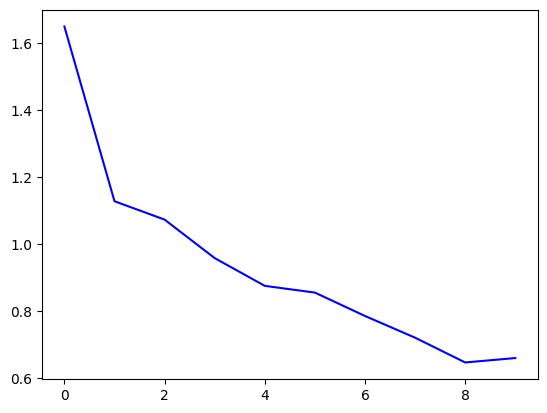

In [ ]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()  